In [1]:
#Učitavamo potrebne biblioteke"
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
#učitavanje dataseta
stanje = pd.read_csv("lendinig_club.txt")
pd.set_option("precision", 2)
stanje.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.12,829.10,11.35,19.48,737,5639.96,28854,52.1,0,0,0,0
1,1,credit_card,0.11,228.22,11.08,14.29,707,2760.00,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.14,366.86,10.37,11.63,682,4710.00,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.10,162.34,11.35,8.10,712,2699.96,33667,73.2,1,0,0,0
4,1,credit_card,0.14,102.92,11.30,14.97,667,4066.00,4740,39.5,0,1,0,0


In [3]:
#Landing_club dataset povezuje ljude kojima je potreban novac – primaoce i investitore. Zadatak je
#kreirati model kako bi što preciznije utvrdili rezultat kolone „not.fully.paid“

In [4]:
#pregled dataseta
stanje.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.0,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9.58e+03,9578.00,9578.00,9578.00,9578.00,9578.00
mean,0.8,0.12,319.09,10.93,12.61,710.85,4560.77,1.69e+04,46.80,1.58,0.16,0.06,0.16
std,0.4,0.03,207.07,0.61,6.88,37.97,2496.93,3.38e+04,29.01,2.20,0.55,0.26,0.37
min,0.0,0.06,15.67,7.55,0.00,612.00,178.96,0.00e+00,0.00,0.00,0.00,0.00,0.00
25%,1.0,0.10,163.77,10.56,7.21,682.00,2820.00,3.19e+03,22.60,0.00,0.00,0.00,0.00
50%,1.0,0.12,268.95,10.93,12.66,707.00,4139.96,8.60e+03,46.30,1.00,0.00,0.00,0.00
75%,1.0,0.14,432.76,11.29,17.95,737.00,5730.00,1.82e+04,70.90,2.00,0.00,0.00,0.00
max,1.0,0.22,940.14,14.53,29.96,827.00,17639.96,1.21e+06,119.00,33.00,13.00,5.00,1.00


In [5]:
#pregled dataseta
stanje.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
#Pomoću LebelEncoder-a transformišemo kolonu "purpose" u numeričku, kako bi mogli da je koristimo
le = LabelEncoder()
stanje_le = stanje.copy()
stanje_le["purpose1"] = le.fit_transform(stanje_le["purpose"])
stanje_le["purpose"] = stanje_le["purpose1"]
stanje_le = stanje_le.drop(["purpose1"], axis = 1)
stanje_le.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.12,829.10,11.35,19.48,737,5639.96,28854,52.1,0,0,0,0
1,1,1,0.11,228.22,11.08,14.29,707,2760.00,33623,76.7,0,0,0,0
2,1,2,0.14,366.86,10.37,11.63,682,4710.00,3511,25.6,1,0,0,0
3,1,2,0.10,162.34,11.35,8.10,712,2699.96,33667,73.2,1,0,0,0
4,1,1,0.14,102.92,11.30,14.97,667,4066.00,4740,39.5,0,1,0,0


In [7]:
stanje_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1010.3 KB


In [8]:
#Primena OneHotEncodera kako bi se tekstualna kolona "purpose" prebacila u numeričku i koristila u modelu 
stanje_OHE = stanje.copy()
stanje_OHE = pd.get_dummies(stanje, columns=["purpose"], drop_first=True)
stanje_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Primena Random Foresta uz LebelEncoder

In [9]:
#definisanje promenjive za X skup
skup_1 = stanje_le[["credit.policy", "int.rate", "installment", "log.annual.inc", "dti", "fico", "days.with.cr.line", "revol.bal", "revol.util", "inq.last.6mths", "delinq.2yrs", "pub.rec", "purpose"]]
skup_1.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose
count,9578.0,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9.58e+03,9578.00,9578.00,9578.00,9578.00,9578.00
mean,0.8,0.12,319.09,10.93,12.61,710.85,4560.77,1.69e+04,46.80,1.58,0.16,0.06,1.94
std,0.4,0.03,207.07,0.61,6.88,37.97,2496.93,3.38e+04,29.01,2.20,0.55,0.26,1.69
min,0.0,0.06,15.67,7.55,0.00,612.00,178.96,0.00e+00,0.00,0.00,0.00,0.00,0.00
25%,1.0,0.10,163.77,10.56,7.21,682.00,2820.00,3.19e+03,22.60,0.00,0.00,0.00,1.00
50%,1.0,0.12,268.95,10.93,12.66,707.00,4139.96,8.60e+03,46.30,1.00,0.00,0.00,2.00
75%,1.0,0.14,432.76,11.29,17.95,737.00,5730.00,1.82e+04,70.90,2.00,0.00,0.00,2.00
max,1.0,0.22,940.14,14.53,29.96,827.00,17639.96,1.21e+06,119.00,33.00,13.00,5.00,6.00


In [10]:
#Train test split podela dataseta
X = skup_1
y = stanje_le["not.fully.paid"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### RandomForestClassifier koristeći dataset koji smo uredili LebelEncoder-om

In [11]:
#Primenjujemo RandomForestClassifier sa nekoliko estimatora kako bi dobili što bolji rezultat
rezultat_le = {}
estimators = [100, 150, 200, 250, 300]
for item in estimators:
    rf = RandomForestClassifier(n_estimators=item)
    model = rf.fit(X_train, y_train)
    rezultat_le[item] = (model.score(X_test, y_test))

pd.set_option("precision", 5)
prikazz = pd.DataFrame.from_dict(rezultat_le, orient='index').rename(columns={0: 'Rezult'})
prikaz_rezultata_le = prikazz.sort_values(by="Rezult", ascending=False)
prikaz_rezultata_le

,Rezult
300,0.84499
200,0.84447
250,0.84238
150,0.84134
100,0.84081


In [12]:
#Pravimo rečnik u koji ćemo poređati kolone po važnosti za naš model, od najbitnije ka manje bitnim
feats = {}
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance

pd.set_option("precision", 5)
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Najbitnije'})
pregled_le = importances.sort_values(by='Najbitnije', ascending=False)
pregled_le

,Najbitnije
installment,0.11656
revol.util,0.11502
days.with.cr.line,0.11490
revol.bal,0.11262
dti,0.11118
log.annual.inc,0.11117
int.rate,0.10409
fico,0.07849
inq.last.6mths,0.05434
purpose,0.04324


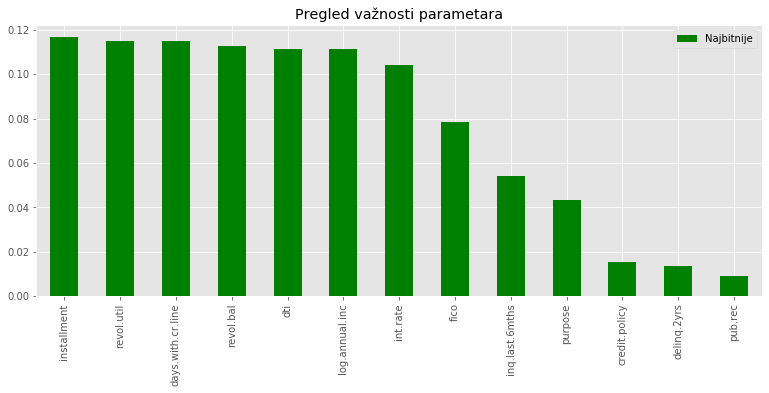

In [13]:
#Grafički prikaz parametara po važnosti u opadajućem redosledu
plt.style.use("ggplot")
pregled_le.plot(kind = "bar", figsize = (13, 5), color = "g", title = "Pregled važnosti parametara")

### RandomForestClassifier koristeći dataset koji smo uredili OneHotEncoder-om

In [14]:
#definisanje promenjive za X skup
skup_2 = stanje_OHE[["credit.policy", "int.rate", "installment", "log.annual.inc", "dti", "fico", 
                     "days.with.cr.line", "revol.bal", "revol.util", "inq.last.6mths", "delinq.2yrs", 
                     "pub.rec", "purpose_credit_card", "purpose_debt_consolidation", "purpose_educational", 
                     "purpose_home_improvement", "purpose_major_purchase", "purpose_small_business"]]
skup_2.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,9578.00000,9578.00000,9578.00000,9578.00000,9578.00000,9578.00000,9578.00000,9.57800e+03,9578.00000,9578.00000,9578.00000,9578.00000,9578.00000,9578.00000,9578.00000,9578.00000,9578.00000,9578.00000
mean,0.80497,0.12264,319.08941,10.93212,12.60668,710.84631,4560.76720,1.69140e+04,46.79924,1.57747,0.16371,0.06212,0.13176,0.41313,0.03581,0.06567,0.04563,0.06463
std,0.39624,0.02685,207.07130,0.61481,6.88397,37.97054,2496.93038,3.37562e+04,29.01442,2.20025,0.54621,0.26213,0.33825,0.49242,0.18583,0.24772,0.20868,0.24588
min,0.00000,0.06000,15.67000,7.54750,0.00000,612.00000,178.95833,0.00000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1.00000,0.10390,163.77000,10.55841,7.21250,682.00000,2820.00000,3.18700e+03,22.60000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,1.00000,0.12210,268.95000,10.92888,12.66500,707.00000,4139.95833,8.59600e+03,46.30000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,1.00000,0.14070,432.76250,11.29129,17.95000,737.00000,5730.00000,1.82495e+04,70.90000,2.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
max,1.00000,0.21640,940.14000,14.52835,29.96000,827.00000,17639.95833,1.20736e+06,119.00000,33.00000,13.00000,5.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [15]:
#Train test split podela dataseta
X = skup_2
y = stanje_OHE["not.fully.paid"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
#Primenjujemo RandomForestClassifier sa nekoliko estimatora kako bi dobili što bolji rezultat
rezultat_ohe = {}
estimators = [100, 150, 200, 250, 300]
for item in estimators:
    rf = RandomForestClassifier(n_estimators=item)
    model = rf.fit(X_train, y_train)
    rezultat_ohe[item] = (model.score(X_test, y_test))

pd.set_option("precision", 5)
prikazz2 = pd.DataFrame.from_dict(rezultat_ohe, orient='index').rename(columns={0: 'Rezult'})
prikaz_rezultata_ohe = prikazz2.sort_values(by="Rezult", ascending=False)
prikaz_rezultata_ohe

,Rezult
100,0.84812
250,0.84812
300,0.84812
150,0.84708
200,0.84708


In [17]:
#Pravimo rečnik u koji ćemo poređati kolone po važnosti za naš model, od najbitnije ka manje bitnim
feats2 = {}
for feature, importance in zip(X.columns, model.feature_importances_):
    feats2[feature] = importance

pd.set_option("precision", 5)
importances = pd.DataFrame.from_dict(feats2, orient='index').rename(columns={0: 'Najbitnije'})
pregled_ohe = importances.sort_values(by='Najbitnije', ascending=False)
pregled_ohe

,Najbitnije
revol.util,0.11362
installment,0.11317
days.with.cr.line,0.11285
revol.bal,0.11168
log.annual.inc,0.11012
dti,0.10973
int.rate,0.10548
fico,0.07886
inq.last.6mths,0.05332
credit.policy,0.01616


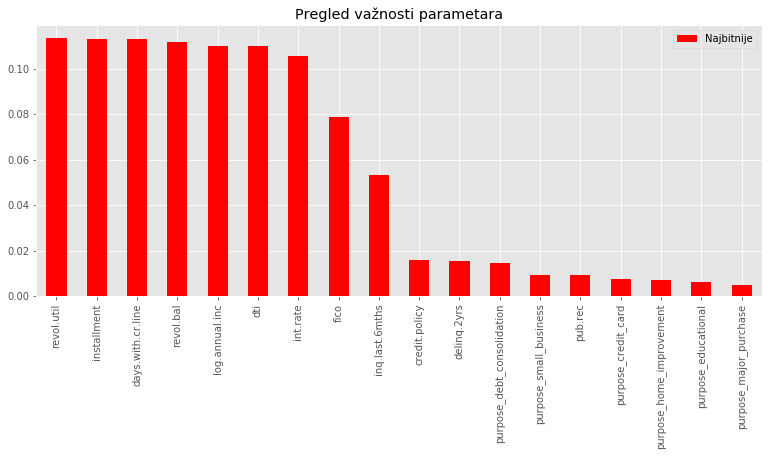

In [18]:
#Grafički prikaz parametara po važnosti u opadajućem redosledu
plt.style.use("ggplot")
pregled_ohe.plot(kind = "bar", figsize = (13, 5), color = "r", title = "Pregled važnosti parametara")

In [19]:
df = prikaz_rezultata_le.merge(prikaz_rezultata_ohe, how = "left", left_index = True, 
                          right_index = True, suffixes = ["-LebelEncoder", "-OneHotEncoder"])
df

,Rezult-LebelEncoder,Rezult-OneHotEncoder
300,0.84499,0.84812
200,0.84447,0.84708
250,0.84238,0.84812
150,0.84134,0.84708
100,0.84081,0.84812


In [20]:
df2 = pregled_le.merge(pregled_ohe,how = "left", left_index = True, 
                          right_index = True, suffixes = ["-LebelEncoder", "-OneHotEncoder"])
df2

,Najbitnije-LebelEncoder,Najbitnije-OneHotEncoder
installment,0.11656,0.11317
revol.util,0.11502,0.11362
days.with.cr.line,0.11490,0.11285
revol.bal,0.11262,0.11168
dti,0.11118,0.10973
log.annual.inc,0.11117,0.11012
int.rate,0.10409,0.10548
fico,0.07849,0.07886
inq.last.6mths,0.05434,0.05332
purpose,0.04324,NaN
